# Download the German model for Stanza

Downloading the German model, which includes pre-trained models and resources necessary for tokenization and sentiment analysis in German language.

In [1]:
import stanza 
import pandas as pd

In [2]:
#download models models for tokenization and sentiment analysis in the german language
stanza.download('de', processors='tokenize,sentiment')

#Initialize the pipeline for German language with tokenization and sentiment analysis
nlp = stanza.Pipeline(lang='de', processors='tokenize,sentiment')

2024-05-08 12:59:40 INFO: Downloaded file to /Users/ullasattler/stanza_resources/resources.json
2024-05-08 12:59:40 WARNING: Language de package default expects mwt, which has been added
2024-05-08 12:59:40 INFO: Downloading these customized packages for language: de (German)...
| Processor       | Package      |
----------------------------------
| tokenize        | gsd          |
| mwt             | gsd          |
| sentiment       | sb10k_charlm |
| backward_charlm | newswiki     |
| pretrain        | conll17      |
| forward_charlm  | newswiki     |

2024-05-08 12:59:40 INFO: File exists: /Users/ullasattler/stanza_resources/de/tokenize/gsd.pt
2024-05-08 12:59:40 INFO: File exists: /Users/ullasattler/stanza_resources/de/mwt/gsd.pt
2024-05-08 12:59:40 INFO: File exists: /Users/ullasattler/stanza_resources/de/sentiment/sb10k_charlm.pt
2024-05-08 12:59:40 INFO: File exists: /Users/ullasattler/stanza_resources/de/backward_charlm/newswiki.pt
2024-05-08 12:59:40 INFO: File exists: /Users/

2024-05-08 12:59:40 INFO: Downloaded file to /Users/ullasattler/stanza_resources/resources.json
2024-05-08 12:59:40 WARNING: Language de package default expects mwt, which has been added
2024-05-08 12:59:41 INFO: Loading these models for language: de (German):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| sentiment | sb10k_charlm |

2024-05-08 12:59:41 INFO: Using device: cpu
2024-05-08 12:59:41 INFO: Loading: tokenize
2024-05-08 12:59:42 INFO: Loading: mwt
2024-05-08 12:59:42 INFO: Loading: sentiment
2024-05-08 12:59:42 INFO: Done loading processors!


# Import Data

In [139]:
#Read csv 
#nrows just for now for testing-delete later
data = pd.read_csv('../data/subset_studium.csv', sep=';', nrows=700)

In [140]:
#Only use labeled data or rows that are not empty
data = data[data['Studium_Label'].notnull()]

In [141]:
data.head()

,Unnamed: 0,Studium,Studium_Label,Studium_Comment
0,0,Die Vorlesungszeit war von Anfang September bi...,neutral,"pos:\nVielzahl an Kursen, praxisnäher, Sprachn..."
1,1,Die Pazmany Universität ist sehr klein im Verg...,positive,pos:\nsehr klein was ich schön und angenehm fa...
2,2,Mit der Universität selbst hatten wir wenig zu...,neutral,neg:\nkaum Zeit zu arbeiten\n\npos: alles ist ...
3,3,Da die Vorlesungen wegen der Pandemie online s...,positive,"pos:\nnette Mensa, großes Kursangebot, leichte..."
4,4,Die City University of Hong Kong hat eine groß...,negative,"neg: \nhoher Workload, Bewertung intransparent..."


In [142]:
#Create copy of data for testing different pos/neutr/neg intervals later
data_copy1= data
data_copy2= data

In [143]:
#Put all texts from column Studium in list
column = data["Studium"]
texts = column.tolist()

# Applying Model

It iterates through each text, tokenizes it into sentences, and computes the sentiment score for each sentence. We weights longer sentences more by factoring in the word count of each sentence during sentiment score calculation. The sentiment scores are then aggregated to determine the overall sentiment of each text, where longer sentences have a proportionally higher impact on the sentiment calculation. Finally, the counts of each sentiment category—positive, negative, or neutral—are printed.

negative, neutral, and positive, represented by 0, 1, 2 


In [28]:
def getSentiment (neutr_interv, neg_interv, df):
    total_sentiment = 0
    neg = 0
    pos = 0
    neutr = 0

#iterate through all texts
    for i, text in enumerate(texts):
        doc = nlp(text)
        text_sentiment = 0
        word_count_all = 0

        #iterate through all sentences in one text
        for sentence in doc.sentences:
            word_count = len(sentence.words)
            word_count_all += word_count
            #take longer sentences into consideration and weighing them more
            text_sentiment += (sentence.sentiment * word_count)
    
        total_sentiment = text_sentiment / word_count_all

        #interval for positive label
        if total_sentiment <= 2 and total_sentiment > neutr_interv:
            pos += 1
            sentiment= "positive"
        #interval for neutral label
        elif total_sentiment <= neutr_interv and total_sentiment >= neg_interv:
            neutr += 1
            sentiment= "neutral"
        #interval for negative label
        else:
            neg += 1
            sentiment= "negative"
        #add sentiment as a new column to the df
        df.loc[i, 'Sentiment'] = sentiment

    #print sum 
    print(f"Neg: {neg} Pos: {pos} Neutr: {neutr}")

In [149]:
#save the df as a new csv
def saveSentiData(name, data):
    filename = f'{name}_studium_with_sentiment.csv'
    data.to_csv(filename, sep=';', index=True)

In [150]:
#Read the saved sentiment data
def readSentiData(name):
    filename = f'{name}_studium_with_sentiment.csv'
    data_senti = pd.read_csv(filename, sep=';', nrows=700)
    data_senti=data_senti[data_senti['Sentiment'].notnull()]
    data_senti=data_senti[data_senti['Studium_Label'].notnull()]
    return data_senti

In [31]:
#intervals for first run
#Neutral is from 1.3 to 0.8
neutr_interv=1.3
neg_interv=0.8

In [32]:
#run method to get text sentiments
getSentiment(neutr_interv, neg_interv, data)

Neg: 21 Pos: 343 Neutr: 260


In [35]:
#give name for the csv file
name="data1"
#run method to save data as csv
saveSentiData(name, data)

In [38]:
#read sentiment data and print the first few lines
data_senti=readSentiData(name)
data_senti.head()

,Unnamed: 0.1,Unnamed: 0,Studium,Studium_Label,Studium_Comment,Sentiment
0,0,0.0,Die Vorlesungszeit war von Anfang September bi...,neutral,"pos:\nVielzahl an Kursen, praxisnäher, Sprachn...",positive
1,1,1.0,Die Pazmany Universität ist sehr klein im Verg...,positive,pos:\nsehr klein was ich schön und angenehm fa...,neutral
2,2,2.0,Mit der Universität selbst hatten wir wenig zu...,neutral,neg:\nkaum Zeit zu arbeiten\n\npos: alles ist ...,positive
3,3,3.0,Da die Vorlesungen wegen der Pandemie online s...,positive,"pos:\nnette Mensa, großes Kursangebot, leichte...",positive
4,4,4.0,Die City University of Hong Kong hat eine groß...,negative,"neg: \nhoher Workload, Bewertung intransparent...",positive


# Evaluation

In [24]:
def calculateMatch(df):
    match_count = (df['Studium_Label'] == df['Sentiment']).sum()
    return match_count

In [39]:
print(calculateMatch(data_senti))

272


In [26]:
def evaluation (data_senti):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
    import matplotlib.pyplot as plt
    data_senti['Studium_Label'] = data_senti['Studium_Label'].astype(str)
    data_senti['Sentiment'] = data_senti['Sentiment'].astype(str)
    confusion_mat = confusion_matrix(data_senti['Studium_Label'], data_senti['Sentiment'], labels=['positive', 'negative', 'neutral'])

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['positive', 'negative', 'neutral'])
    disp.plot()
    plt.show()
    print(f1_score(data_senti['Studium_Label'], data_senti['Sentiment'], labels=['positive', 'negative', 'neutral'], average='micro'))
    print(classification_report(
        data_senti['Studium_Label'],
        data_senti['Sentiment'],
        output_dict=False,
        target_names=['positive', 'negative', 'neutral']
    ))

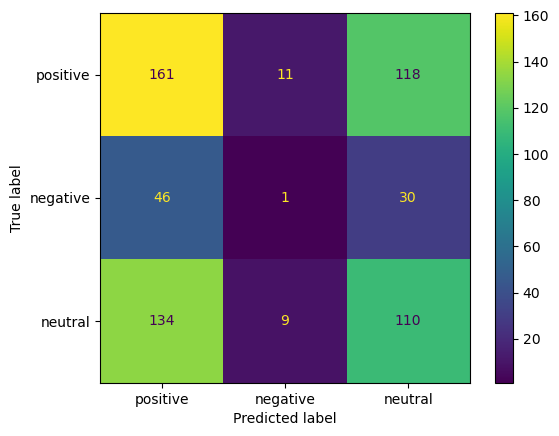

0.4387096774193549
              precision    recall  f1-score   support

    positive       0.05      0.01      0.02        77
    negative       0.43      0.43      0.43       253
     neutral       0.47      0.56      0.51       290

    accuracy                           0.44       620
   macro avg       0.32      0.33      0.32       620
weighted avg       0.40      0.44      0.42       620



In [40]:
evaluation(data_senti)

## Different Intevals

In [41]:
#intervals for second run
neutr_interv=1.2
neg_interv=0.9

In [42]:
getSentiment(neutr_interv, neg_interv, data_copy1)

Neg: 42 Pos: 425 Neutr: 157


In [43]:
name="data2"
saveSentiData(name, data_copy1)

In [44]:
data_senti=readSentiData(name)
data_senti.head()

,Unnamed: 0.1,Unnamed: 0,Studium,Studium_Label,Studium_Comment,Sentiment
0,0,0.0,Die Vorlesungszeit war von Anfang September bi...,neutral,"pos:\nVielzahl an Kursen, praxisnäher, Sprachn...",positive
1,1,1.0,Die Pazmany Universität ist sehr klein im Verg...,positive,pos:\nsehr klein was ich schön und angenehm fa...,negative
2,2,2.0,Mit der Universität selbst hatten wir wenig zu...,neutral,neg:\nkaum Zeit zu arbeiten\n\npos: alles ist ...,positive
3,3,3.0,Da die Vorlesungen wegen der Pandemie online s...,positive,"pos:\nnette Mensa, großes Kursangebot, leichte...",positive
4,4,4.0,Die City University of Hong Kong hat eine groß...,negative,"neg: \nhoher Workload, Bewertung intransparent...",positive


In [46]:
print(calculateMatch(data_senti))

258


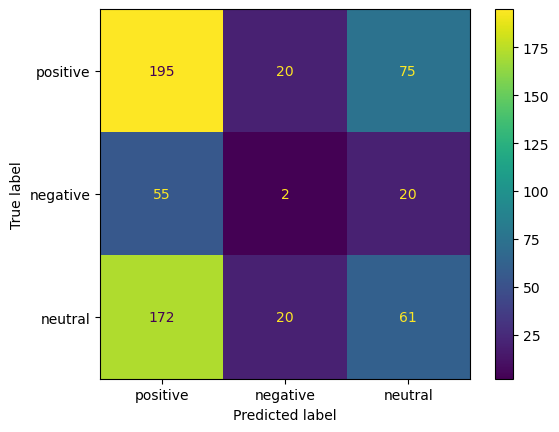

0.4161290322580646
              precision    recall  f1-score   support

    positive       0.05      0.03      0.03        77
    negative       0.39      0.24      0.30       253
     neutral       0.46      0.67      0.55       290

    accuracy                           0.42       620
   macro avg       0.30      0.31      0.29       620
weighted avg       0.38      0.42      0.38       620



In [47]:
evaluation(data_senti)

### Different intervals to test:

intervals for damp/boost run
neutr_interv=1.3
neg_interv=0.9
____________
neutr_interv=1.4
neg_interv=0.9
____________
neutr_interv=1.3
neg_interv=0.95
____________
neutr_interv=1.2
neg_interv=0.95

## Add Dampener and Booster

In [48]:
# Read the Excel file into a DataFrame
df = pd.read_excel('../data/Booster_Dampner_stanza.xlsx')

# Initialize dictionaries for booster and dampner
booster = {}
dampner = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    booster[row['Booster']] = 1.5  # Assigning a score of 1.5 for each booster
    dampner[row['Dampener']] = 0.5  # Assigning a score of 0.5 for each dampner

print("Booster Dictionary:")
print(booster)
print("\nDampner Dictionary:")
print(dampner)

Booster Dictionary:
{'vielfältiger': 1.5, 'Motivation hielt sich sehr stark zurück': 1.5, 'Vielzahl an Kursen': 1.5, 'praxisnäher': 1.5, 'Sprachniveau angemessen': 1.5, 'Sprachkurs angeboten': 1.5, 'sehr klein was ich schön und angenehm fand': 1.5, 'sehr willkommen': 1.5, 'nie Schwierigkeiten': 1.5, 'einfach neue Leute kennenlernen': 1.5, 'alles ist entspannt': 1.5, 'Zeit reicht für alles aus': 1.5, 'Mensen sind sehr empfehlenswert': 1.5, 'Studium interaktiver': 1.5, 'Note nicht nur aus 100% Exam': 1.5, 'großen Spaß': 1.5, ' langfristig mehr mitgenommen': 1.5, 'Angebot umfangreich': 1.5, 'Einführungswoche sorgt für guten Start ins Auslandssemester': 1.5, 'Dozenten gut organsisiert': 1.5, 'antworten sehr schnell': 1.5, 'eigene Mensa': 1.5, 'eigene Bibliothek': 1.5, 'genug Platz': 1.5, 'Kursangebot war riesig': 1.5, 'Kursangebot riesig': 1.5, 'Kursangebot groß': 1.5, 'Campus bietet was man braucht': 1.5, 'Dozierenden sehr qualifiziert': 1.5, 'System gut gefallen': 1.5, 'genug Freizeit': 

In [49]:
#dataBoost = pd.read_csv('../data/subset_studium.csv', sep=';', nrows=100)

In [50]:
#dataBoost = dataBoost[dataBoost['Studium_Label'].notnull()]

In [51]:
#column = dataBoost["Studium"]
#texts = column.tolist()

In [144]:
from collections import Counter

# Count frequency of booster and dampener words
booster_counts = Counter(booster)
dampner_counts = Counter(dampner)

In [145]:
def adjust_sentiment(sentiment_score, words):
    #print(f"Anfang:{sentiment_score}")
    # Überprüfen, ob ein Booster- oder Dämpferwort im Satz vorkommt
    has_booster = any(word in booster for word in words)
    has_dampener = any(word in dampner for word in words)

    # Wenn ein Boosterwort vorhanden ist, multipliziere den Sentiment-Score mit dem entsprechenden Wert
    if has_booster:
        booster_word = next((word for word in words if word in booster), None)
        #print(f"Has Booster {has_booster} : {booster_word}")
        sentiment_score *= max(booster.values())
        #print(f"Boost:{sentiment_score}")
    # Wenn ein Dämpferwort vorhanden ist, multipliziere den Sentiment-Score mit dem entsprechenden Wert
    if has_dampener:
        sentiment_score *= min(dampner.values())
        #print(f"Damp:{sentiment_score}")
    return sentiment_score

In [146]:
def getSentimentBoostDamp(neutr_interv,neg_interv, df):
    total_sentiment = 0
    neg = 0
    pos = 0
    neutr = 0
    for i, text in enumerate(texts):
        doc = nlp(text)
        total_sentiment = 0
        word_count_all = 0
        
        for sentence in doc.sentences:
            word_count = len(sentence.words)
            word_count_all += word_count
        
            sentence_sentiment = sentence.sentiment
            words_in_sentence = [word.text.lower() for word in sentence.words]
            sentiment_score = adjust_sentiment(sentence_sentiment, words_in_sentence) * word_count     
            
            total_sentiment += sentiment_score
            
        # Calculate overall sentiment based on adjusted scores
        average_sentiment = total_sentiment / word_count_all
        
        # Classify sentiment category based on adjusted scores
        if neutr_interv < average_sentiment <= 2.0:
            sentiment = "positive"
            pos+=1
        elif neg_interv <= average_sentiment <= neutr_interv:
            sentiment = "neutral"
            neutr+=1
        else:
            sentiment = "negative"
            neg+=1
        
        df.loc[i, 'Sentiment'] = sentiment
        #print(average_sentiment)
        #print sum 
    print(f"Neg: {neg} Pos: {pos} Neutr: {neutr}")
        

In [147]:
#intervals for damp/boost run
neutr_interv=1.3
neg_interv=0.8

In [148]:
getSentimentBoostDamp(neutr_interv, neg_interv, data_copy2)

Neg: 21 Pos: 345 Neutr: 258


In [151]:
name="data3"
saveSentiData(name, data_copy2)

In [152]:
data_senti_boost=readSentiData(name)
data_senti_boost.head()

,Unnamed: 0.1,Unnamed: 0,Studium,Studium_Label,Studium_Comment,Sentiment
0,0,0.0,Die Vorlesungszeit war von Anfang September bi...,neutral,"pos:\nVielzahl an Kursen, praxisnäher, Sprachn...",positive
1,1,1.0,Die Pazmany Universität ist sehr klein im Verg...,positive,pos:\nsehr klein was ich schön und angenehm fa...,neutral
2,2,2.0,Mit der Universität selbst hatten wir wenig zu...,neutral,neg:\nkaum Zeit zu arbeiten\n\npos: alles ist ...,positive
3,3,3.0,Da die Vorlesungen wegen der Pandemie online s...,positive,"pos:\nnette Mensa, großes Kursangebot, leichte...",positive
4,4,4.0,Die City University of Hong Kong hat eine groß...,negative,"neg: \nhoher Workload, Bewertung intransparent...",positive


In [154]:
print(calculateMatch(data_senti))

259


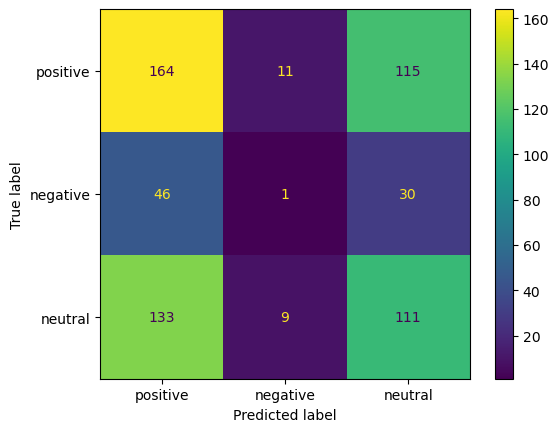

0.44516129032258067
              precision    recall  f1-score   support

    positive       0.05      0.01      0.02        77
    negative       0.43      0.44      0.44       253
     neutral       0.48      0.57      0.52       290

    accuracy                           0.45       620
   macro avg       0.32      0.34      0.32       620
weighted avg       0.41      0.45      0.42       620



In [153]:
evaluation(data_senti_boost)